<a href="https://colab.research.google.com/github/1804054Miraz/My_Thesis_Work/blob/main/Time_domain_to_Frequency_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Set the input and output locations
def directory_send(path):
  print(path)
  input_location = '/content/drive/MyDrive/Dataset/EEG_FULL/Transfer_new_non_alcoholic/'+path+'/'
  !mkdir '/content/drive/MyDrive/Dataset/EEG_FULL/EEG_Power_Spectrum_files/PS_Non-alcoholic/'+ path
  time.sleep(3)
  output_location = '/content/drive/MyDrive/Dataset/EEG_FULL/EEG_Power_Spectrum_files/PS_Non-alcoholic/'+path+'/'

  # Ensure the output directory exists
  os.makedirs(output_location, exist_ok=True)

  # Define the sampling rate (Hz)
  sampling_rate = 256

  # Function to calculate the power spectrum using FFT
  def calculate_power_spectrum(data_row, sampling_rate):
      n = len(data_row)
      frequencies = fftfreq(n, d=1/sampling_rate)
      fft_values = fft(np.ascontiguousarray(data_row))
      power_spectrum = np.abs(fft_values)**2 / n

      # Reduce both frequencies and power_spectrum to the first 31 values
      # frequencies = frequencies[:100]
      # power_spectrum = power_spectrum[:100]

      # return frequencies, power_spectrum
      return frequencies[:n//2], power_spectrum[:n//2]

  # Function to calculate the power spectrum and save to CSV
  def calculate_and_save_power_spectrum(input_csv, output_csv):
      eeg_data = pd.read_csv(input_csv)

      # Create an empty DataFrame to accumulate frequency-domain data
      df_freq_power_spectrum_all = pd.DataFrame(columns=['Frequency'])

      # Function to calculate the power spectrum for a given channel
      def plot_power_spectrum(data_column, column_name):
          frequencies, power_spectrum = calculate_power_spectrum(data_column, sampling_rate)

          # Append data for the current column to the overall DataFrame
          df_freq_power_spectrum_all['Frequency'] = frequencies

          # Create new columns for each frequency band's power spectrum
          df_freq_power_spectrum_all[column_name + '_PS'] = power_spectrum

      # Plot power spectrum for each channel
      for column in eeg_data.columns:
          plot_power_spectrum(eeg_data[column], column)

      # Save the overall DataFrame to a single CSV file
      df_freq_power_spectrum_all.to_csv(output_csv, index=False)

  # Iterate through CSV files in the input location
  for csv_file in os.listdir(input_location):
      if csv_file.endswith('.csv'):
          input_csv_path = os.path.join(input_location, csv_file)
          output_csv_path = os.path.join(output_location, f'ps_{csv_file}')
          # print(input_csv_path)
          calculate_and_save_power_spectrum(input_csv_path, output_csv_path)


In [ ]:
input_directory = '/content/drive/MyDrive/Dataset/EEG_FULL/Transfer_new_non_alcoholic/'
global flag
flag=0
for folder in os.listdir(input_directory):
    directory_send(folder)
    # break

In [ ]:
df=df[7:13]
df

,Frequency,FP1_PS,FP2_PS,F7_PS,F8_PS,AF1_PS,AF2_PS,FZ_PS,F4_PS,F3_PS,...,PO7_PS,PO8_PS,FCZ_PS,POZ_PS,OZ_PS,P2_PS,P1_PS,CPZ_PS,nd_PS,Y_PS
7,7.0,124.302349,114.026287,53.575808,30.383514,46.353334,65.388987,5.473728,49.807385,23.900914,...,49.791321,40.464715,0.312909,14.098850,84.324251,5.976721,0.972879,1.228122,136.108856,196.854939
8,8.0,274.022992,266.597703,67.620404,41.490762,179.733520,97.593082,76.264312,75.108355,75.340554,...,308.582332,97.840382,25.181491,61.500840,158.615784,25.467546,18.585576,6.144216,272.711322,96.152796
9,9.0,25.581347,41.449891,14.982923,22.081535,16.713893,23.177969,9.805245,47.152529,6.862324,...,261.705084,106.823842,1.333201,20.794611,97.233725,3.799001,18.210689,4.598298,26.625364,36.051439
10,10.0,17.479117,8.728101,10.768177,46.260586,5.353066,9.727944,2.817654,18.237952,11.946434,...,556.479957,122.354482,0.445997,31.355536,94.170260,15.350559,13.604425,1.515879,13.744664,4.716998
11,11.0,41.221054,111.394197,28.884261,36.281270,52.883391,18.736470,15.574961,13.317488,31.608262,...,127.643771,76.831437,5.210967,126.467511,299.511182,43.505085,56.117050,7.213290,42.996762,0.997960
12,12.0,18.752738,67.971999,62.941862,8.037908,18.316356,9.485840,5.445237,4.274328,58.119686,...,34.102421,9.736223,0.841504,12.005258,6.788832,16.887849,7.932747,1.175129,15.617649,14.794585


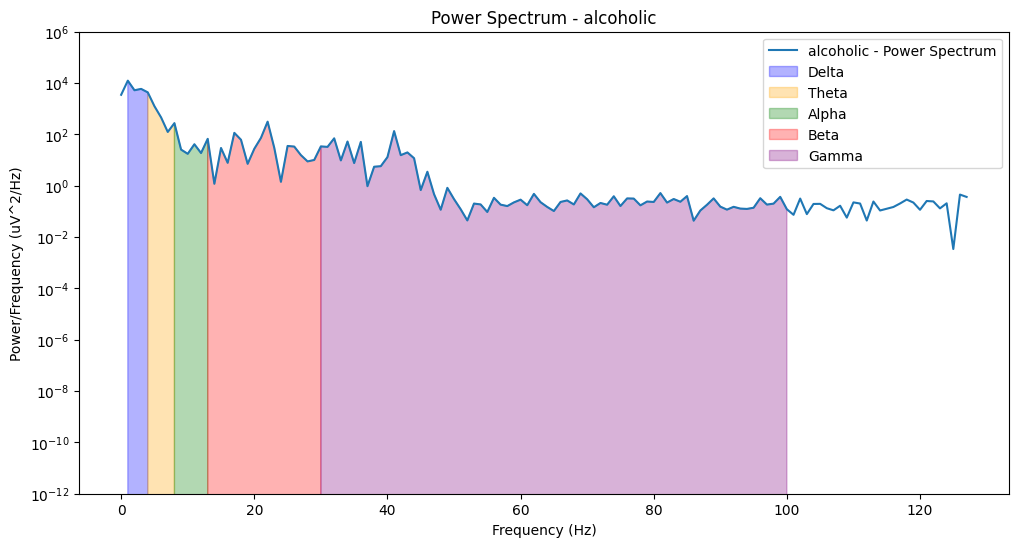

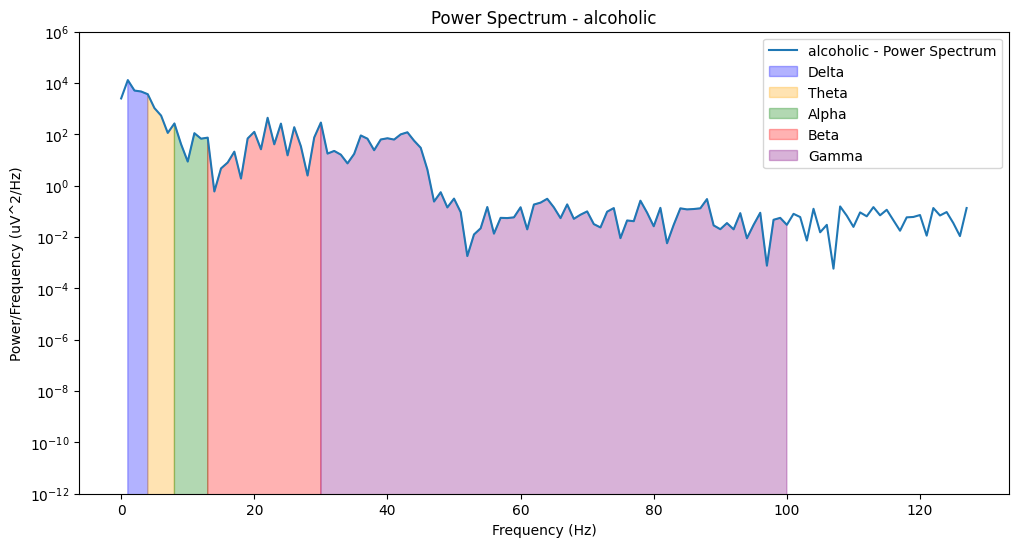

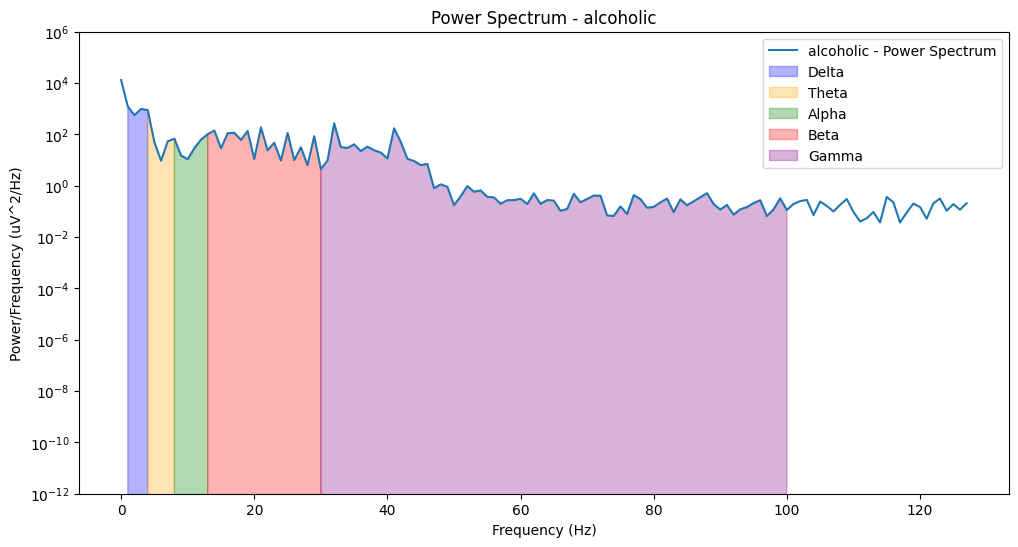

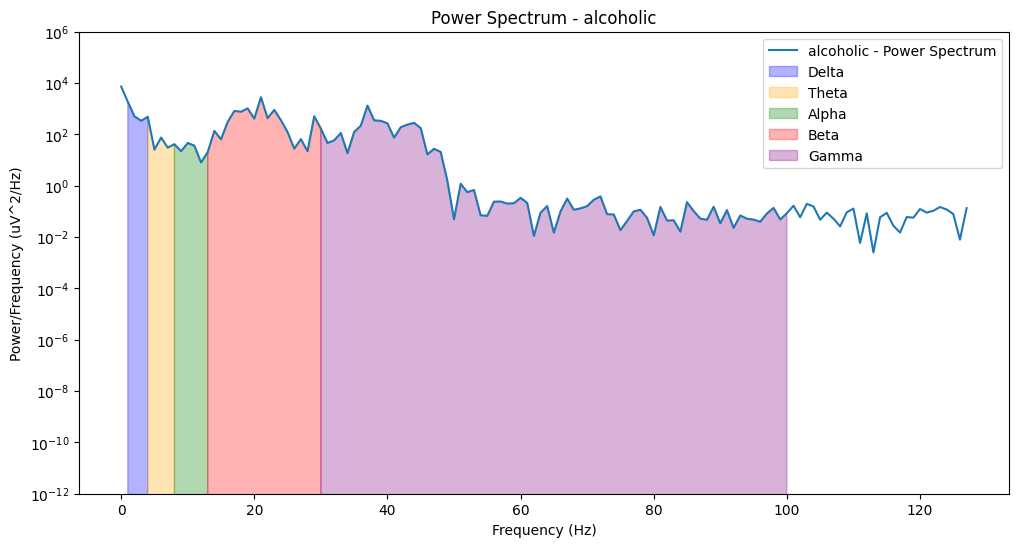

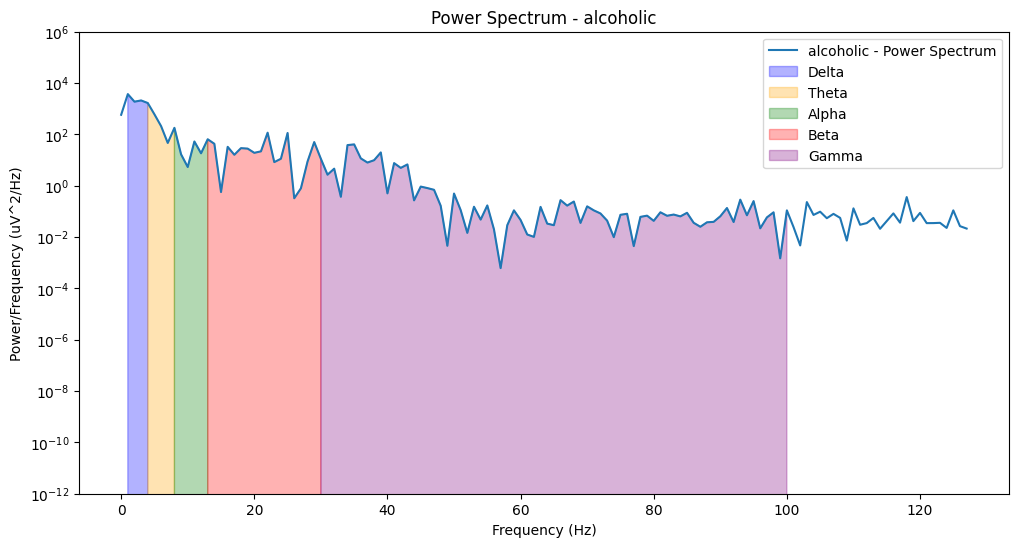

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/EEG_Power_Spectrum_files/PS_Alcoholic/364/ps_a_364_055_S2match.csv'
eeg_data = pd.read_csv(alcoholic_path)

# Function to plot the power spectrum for a given channel
def plot_power_spectrum(data_column, frequencies, label_name):
    # Define frequency bands
    delta_band = (0.5, 4)
    theta_band = (4, 8)
    alpha_band = (8, 13)
    beta_band = (13, 30)
    gamma_band = (30, 100)

    # Plot the power spectrum directly from the DataFrame
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, data_column, label=f'{label_name} - Power Spectrum')

    # Highlight different frequency bands
    plt.fill_between(frequencies, 0, data_column, where=(frequencies >= delta_band[0]) & (frequencies <= delta_band[1]), color='blue', alpha=0.3, label='Delta')
    plt.fill_between(frequencies, 0, data_column, where=(frequencies >= theta_band[0]) & (frequencies <= theta_band[1]), color='orange', alpha=0.3, label='Theta')
    plt.fill_between(frequencies, 0, data_column, where=(frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]), color='green', alpha=0.3, label='Alpha')
    plt.fill_between(frequencies, 0, data_column, where=(frequencies >= beta_band[0]) & (frequencies <= beta_band[1]), color='red', alpha=0.3, label='Beta')
    plt.fill_between(frequencies, 0, data_column, where=(frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1]), color='purple', alpha=0.3, label='Gamma')

    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-12, 1e6)  # Adjust y-axis limits based on your data
    plt.title(f'Power Spectrum - {label_name}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    plt.legend()
    plt.show()

# Plot power spectrum for each channel
i=0
for column in eeg_data.columns[1:]:  # Skip the first column (assuming it's 'Frequency')
    plot_power_spectrum(eeg_data[column], eeg_data['Frequency'], 'alcoholic')
    if i==4:
      break
    i+=1


In [ ]:
# p = '/content/drive/MyDrive/Dataset/EEG_FULL/Filtered_Data_Non-alcoholic/alpha_band_data_337.csv'
p = '/content/drive/MyDrive/Dataset/EEG_FULL/Filtered_Data_alcoholic/alpha_band_data_364.csv'
df = pd.read_csv(p)
df[20:50]
